# Assignment 11 – Decision Tree Classification


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


In [26]:
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [27]:
print("Shape:", df.shape)
df.info()
df.describe(include="all").T

Shape: (908, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,908.0,NaN,NaN,NaN,53.79185,9.158031,29.0,47.75,54.0,60.0,77.0
sex,908,2,Male,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,908,4,asymptomatic,495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,908.0,NaN,NaN,NaN,133.430617,20.401608,0.0,120.0,130.0,144.0,200.0
chol,908.0,NaN,NaN,NaN,201.484581,112.097949,0.0,176.75,224.0,270.0,603.0
fbs,908,2,False,723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,908,3,normal,542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalch,908.0,NaN,NaN,NaN,135.957048,26.804929,60.0,118.0,138.0,156.0,202.0
exang,908,4,False,516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,846.0,NaN,NaN,NaN,0.891253,1.093875,-2.6,0.0,0.5,1.5,6.2


Missing values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


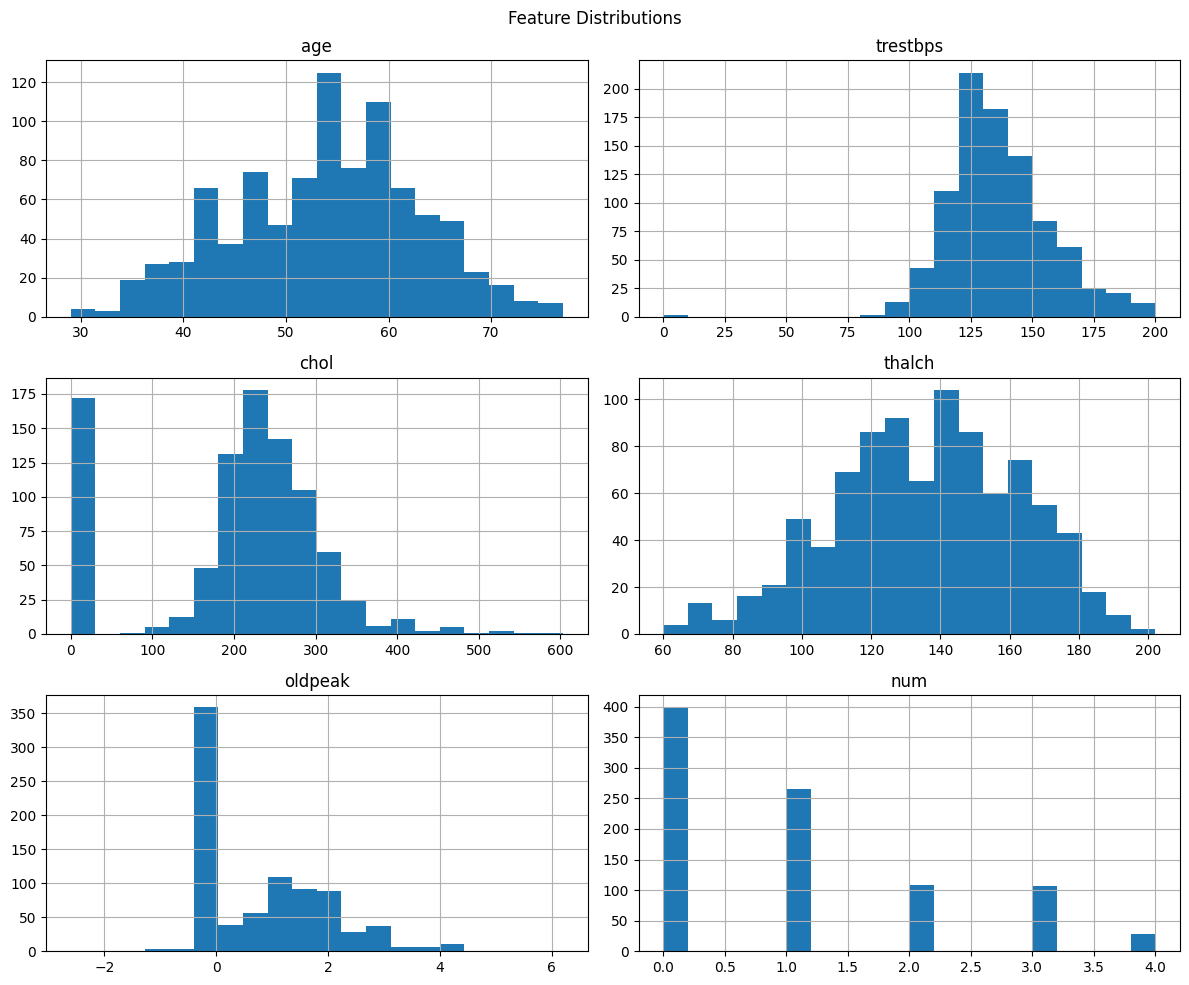

<Figure size 1200x600 with 0 Axes>

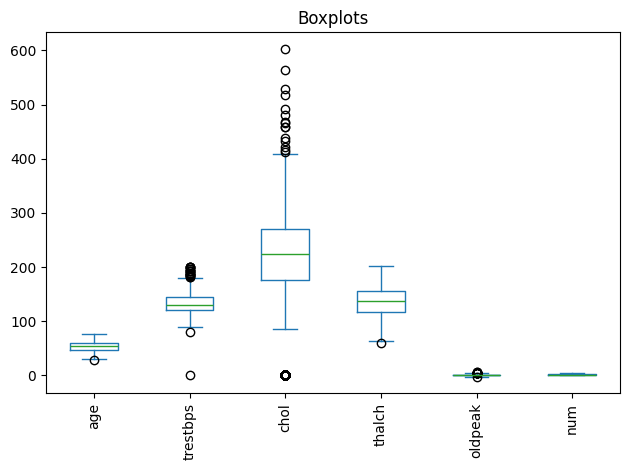

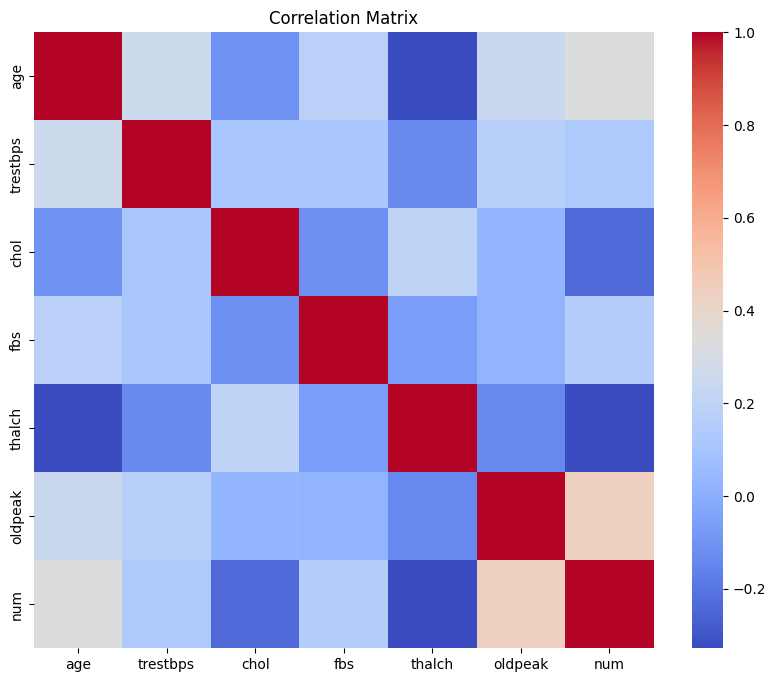

In [28]:
print("Missing values:\n", df.isna().sum())

df.hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
df.plot(kind="box", rot=90)
plt.title("Boxplots")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Feature Engineering & Preprocessing

In [29]:
target_col = 'age'

df['age_category'] = pd.cut(df[target_col], bins=5, labels=False, include_lowest=True)

X = df.drop(columns=[target_col, 'age_category']) # Drop original 'age' and the new 'age_category' from features
y = df['age_category'] # Use the binned age as the target

for col in X.select_dtypes(include="object").columns:
    X[col] = X[col].astype(str)
    X[col] = LabelEncoder().fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Decision Tree Model

In [30]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
print("F1-score :", f1_score(y_test, y_pred, average='weighted'))
print("ROC-AUC  :", roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted'))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy : 0.35714285714285715
Precision: 0.346444227123384
Recall   : 0.35714285714285715
F1-score : 0.3453883412133662
ROC-AUC  : 0.5533136140452503

Classification Report:

              precision    recall  f1-score   support

           0       0.20      0.09      0.12        11
           1       0.34      0.51      0.41        41
           2       0.33      0.28      0.31        64
           3       0.43      0.44      0.43        55
           4       0.17      0.09      0.12        11

    accuracy                           0.36       182
   macro avg       0.29      0.28      0.28       182
weighted avg       0.35      0.36      0.35       182



## Hyperparameter Tuning

In [31]:
param_grid = {
    "max_depth": [None, 3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="f1_weighted"
)
grid.fit(X_train, y_train)

best_dt = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


## Tree Visualization & Feature Importance

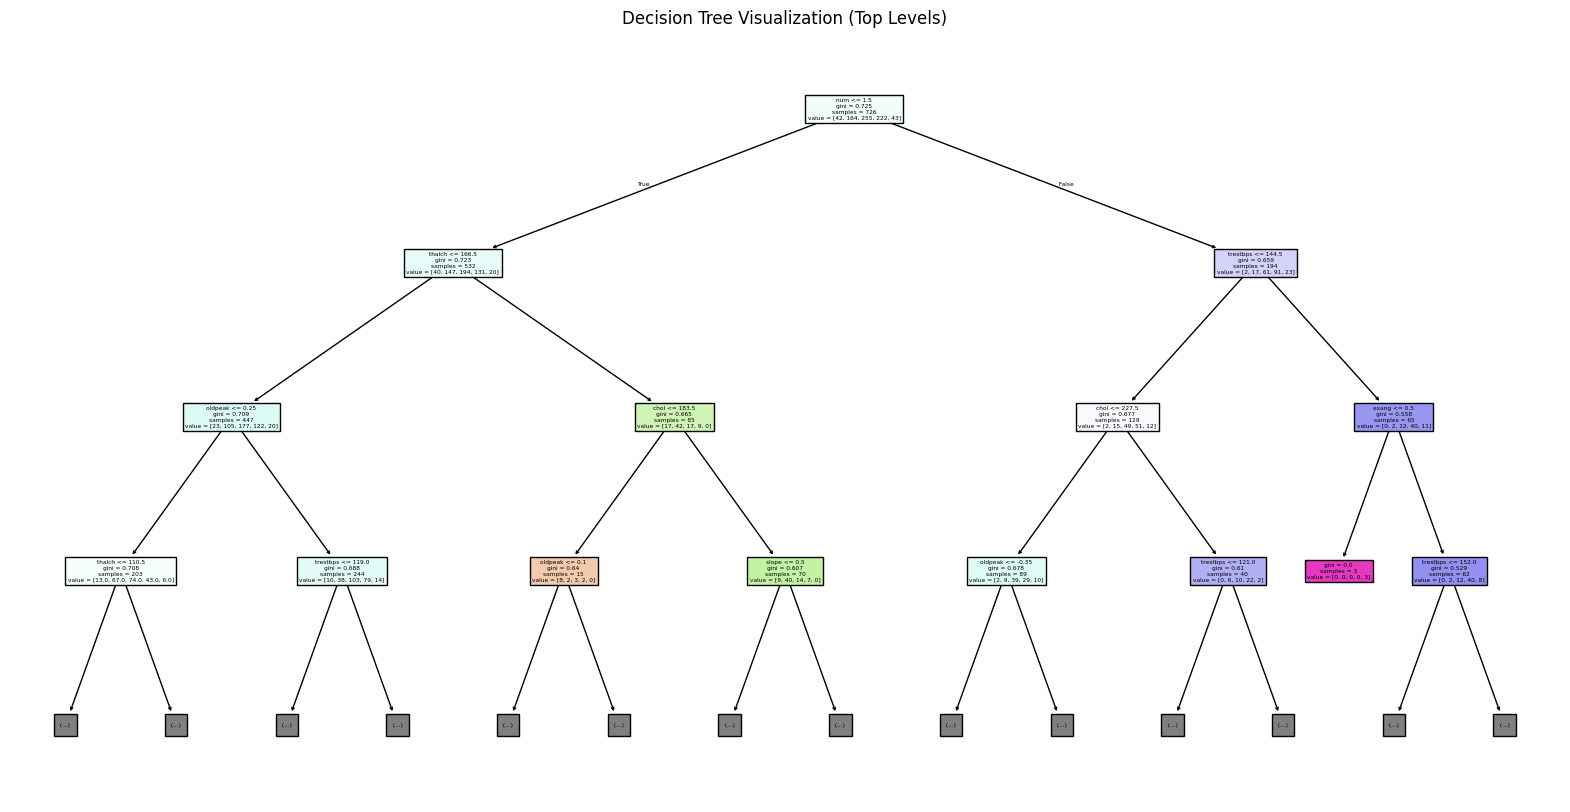

,0
thalch,0.217989
trestbps,0.211936
num,0.173552
oldpeak,0.165268
chol,0.155910
exang,0.038649
cp,0.019511
slope,0.017184
sex,0.000000
restecg,0.000000


In [32]:
plt.figure(figsize=(20,10))
plot_tree(
    best_dt,
    feature_names=X.columns,
    filled=True,
    max_depth=3
)
plt.title("Decision Tree Visualization (Top Levels)")
plt.show()

pd.Series(best_dt.feature_importances_, index=X.columns).sort_values(ascending=False)